# Building a neural network from scratch (simple MLP)

## Plan
- Initialise Model and Parameters
- Forward Propagation
- Cost Computation
- Backward Propagation
- Update Weights & Biases
- Running the whole thing
- Testing (pytest things are in the right shape etc.)
- Try out a simple dataset

I'll create helper functions as we go in each relevant section

## Initialise Model and Parameters

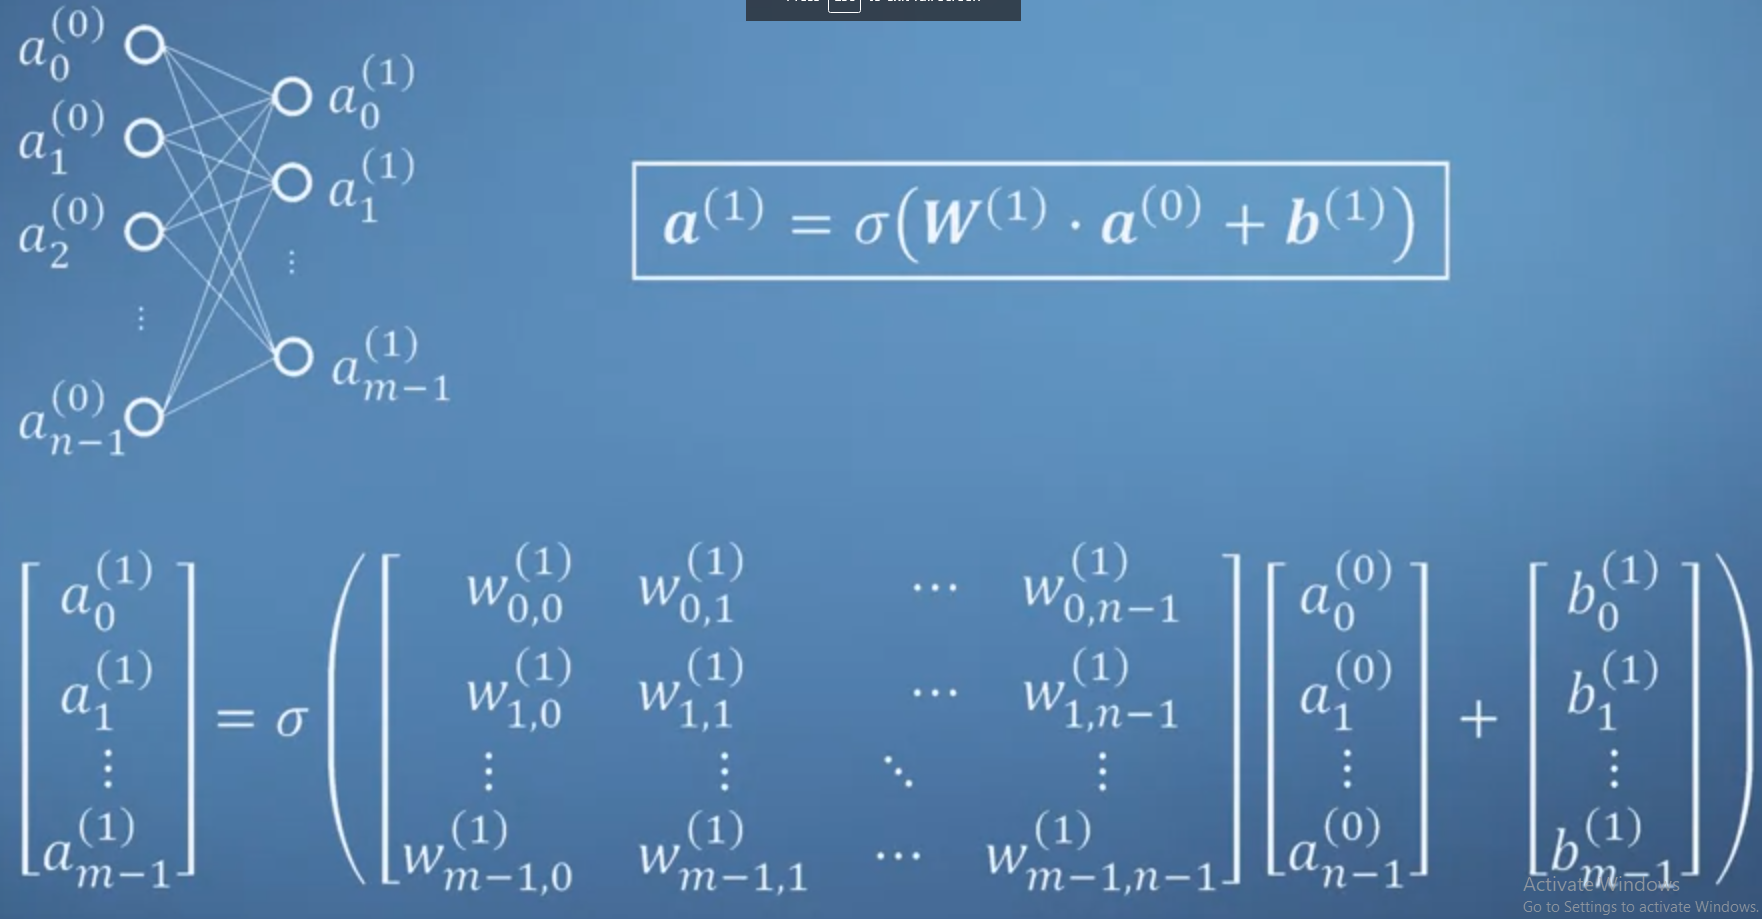

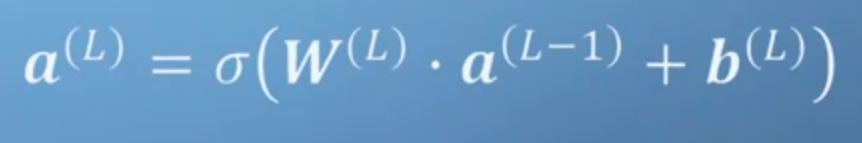

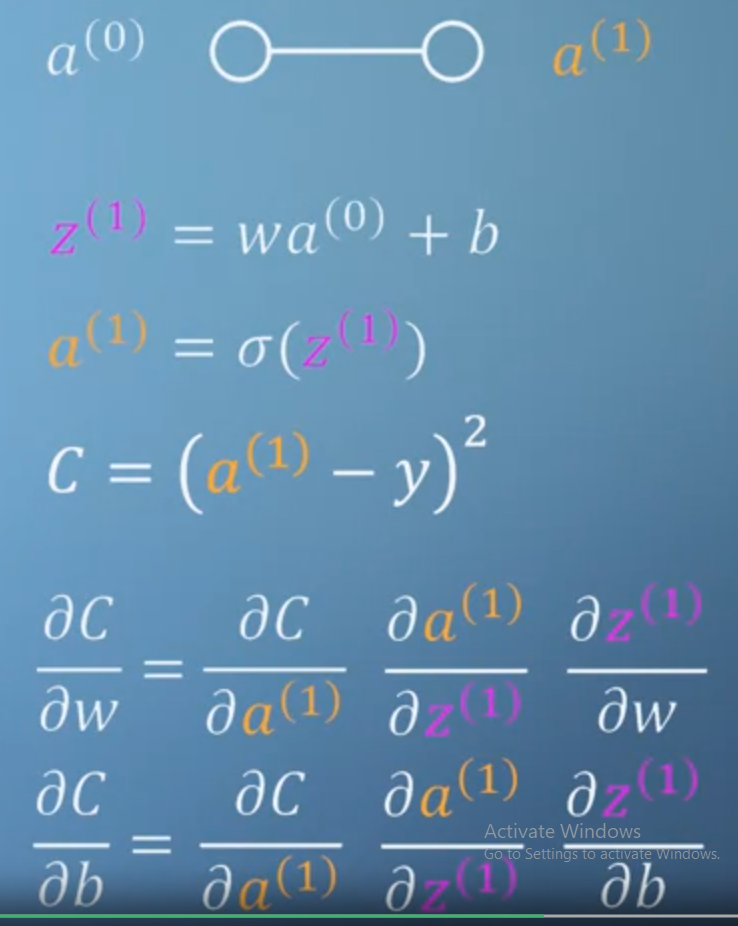

In [83]:
import numpy as np

In [84]:
train = np.genfromtxt('datasets/mnist/train.csv', delimiter=',')

In [85]:
print(f"Training data shape: {train.shape}")

Training data shape: (42001, 785)


In [200]:
train_data = train[1:1001 , 1:].astype(float).T # just grabbing the first 1000 and ignoring the label column and headers
# transposing so we have (pixels, examples) shape

train_labels = train[1:1001, 0].astype(int) # just the labels
nb_classes = len(np.unique(train_labels))

train_labels_ohe = np.eye(nb_classes)[train_labels]

print(f"Training data new shape: {train_data.shape}")
print(f"Training labels shape: {train_labels_ohe.shape}")

largest_pixel = np.amax(train_data)
print(f"Largest pixel value: {largest_pixel}")

# 1000 rows of examples, 784 pixels each

Training data new shape: (784, 1000)
Training labels shape: (1000, 10)
Largest pixel value: 255.0


In [201]:
train_data_scaled = train_data / largest_pixel
print(f"New largest pixel value: {np.amax(train_data_scaled)}")

New largest pixel value: 1.0


In [202]:
def initialise_parameters(dimensions):
    """
    Arguments:
    dimensions -- list containing the dimensions of the desired model
    
    Returns:
    parameters -- dictionary containing parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (dimensions[l], dimensions[l-1])
                    bl -- bias vector of shape (dimensions[l], 1)
    """
    
    np.random.seed(0)
    parameters = {}
    L = len(dimensions)  # Number of layers

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(dimensions[l], dimensions[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((dimensions[l], 1))
        
        assert(parameters['W' + str(l)].shape == (dimensions[l], dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))

        
    return parameters

In [203]:
input_shape = train_data.shape[0]  # number of pixels
output_shape = len(np.unique(train_labels))  # number of categories
dims = [input_shape, 20, output_shape]
print(f"Model dimensions: {dims}")

params = initialise_parameters(dims)

print("\nWeights and biases initialised randomly with the following shapes:\n")
for i in list(params.keys()):
    print(f"{i}: {params[i].shape}")

Model dimensions: [784, 20, 10]

Weights and biases initialised randomly with the following shapes:

W1: (20, 784)
b1: (20, 1)
W2: (10, 20)
b2: (10, 1)


In [204]:
# params is the name of the thing you want to take from here

In [205]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    
    assert(A.shape == Z.shape)
    
    cache = Z
    return A, cache

In [206]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [207]:
# input the model architecture, neurons and layers etc
# initialise random weights and biases
# output the stuff

## Forward Propagation

In [208]:
# input: activations from previous layer (their outputs)
# all the weights of the current layer
# all the biases of the current layer

# do: multiply the previous activations with the weights and add bias
# put it through an activation function (sigmoid or relu, etc.)
# save the weights, bias and activations in a cache to help with back prop

# the final layer outputs, to be used to calculate cost function

In [209]:
# Z is gonna be 10, 1*examples

def softmax(Z):
    """
    Implements the softmax activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of softmax(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    exps = np.exp(Z - np.max(Z))
    A = exps / exps.sum(axis=0, keepdims=True)
    
    assert (A.shape == Z.shape)
    
    cache = Z
    return A, cache

# def softmax(Z):
#     shiftZ = Z - np.max(Z)
#     exps = np.exp(shiftZ)
#     A = exps / np.sum(exps)
#     assert (A.shape == Z.shape)
#     return A
#
#
# def softmax_back(dA, cache):
#     Z = cache
#     exps = np.exp(dA - dA.max())
#     dZ = exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
#     assert (dZ.shape == Z.shape)
#     return dZ

In [210]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): numpy array of shape (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector: numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b": stored for computing the backward pass efficiently
    """

    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    
    cache = (A, W, b)
    
    return Z, cache

In [211]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): numpy array of shape (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector: numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    elif activation == "softmax":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    cache = (linear_cache, activation_cache)

    return A, cache

In [212]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data: numpy array of shape (input size, number of examples)
    parameters -- output of initialise_parameters()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 caches, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2  # number of layers in the neural network
    
    # For all layers except the final one, do a forward pass
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu')
        caches.append(cache)
    
    # Complete the final forward pass on the final layer using softmax rather than relu
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], 'softmax')
    caches.append(cache)
    
    assert(AL.shape == (10, X.shape[1]))  # shape should be number of categories by number of examples
            
    return AL, caches

In [213]:
AL, caches = L_model_forward(train_data_scaled, params)

In [214]:
# looks like it is working up to here

## Cost Computation

In [215]:
# input: activations from last layer
# the actual label, the Y value, true label...

# calculate cross-entropy loss and return it

In [219]:
def compute_cost(AL, Y, activation):
    """
    Implement the cross-entropy cost function.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (number of categories, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (number of categories, number of examples)
    activation -- the final layer activation

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    if activation == 'sigmoid':
        cost = - np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1 - Y), np.log(1 - AL))) / m
        
    elif activation == 'softmax':
        cost = - np.mean(Y * np.log(AL.T + 1e-8))
    
    cost = np.squeeze(cost)  # To make sure your cost's shape is what we expect
    assert(cost.shape == ())
    
    return cost

In [220]:
cost = compute_cost(AL, train_labels_ohe, 'softmax')

In [221]:
cost

0.23024942892170874

In [ ]:
# this looks like it works but i dont believe it, we'll see

# back prop tomorrow!

## Backward Propagation

In [4]:
# input: 

## Update Weights and Biases

## Run the model